In [1]:
# Import libraries
import numpy as np 
import pandas as pd




import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from pandas.io.json import json_normalize
from wordcloud import WordCloud
import math
import re
import json
import random
import string

import re
import nltk

from nltk.tokenize import word_tokenize

pd.set_option("display.max_colwidth", 500)

In [2]:
df1 = pd.read_csv('Data/correct_predictions_df_372_4.csv')
df2 = pd.read_csv('Data/correct_predictions_df_1341_4.csv')
df3 = pd.read_csv('Data/sentiment.csv')
df4 = pd.read_csv('Data/combined_ML1_ML2_15000.csv')

In [3]:
label_mapping = {
    'negative-Negative-Xumaan': 'Negative-Xumaan',
    'positive-Positive-Wanaag': 'Positive-Wanaag',
    'neutral-Neutral-Dhexdhexaad': 'Neutral-Dhexdhexaad',
    'Negative-Xumaan': 'Negative-Xumaan',  # Ensures consistency if already correctly formatted
    'Positive-Wanaag': 'Positive-Wanaag',
    'Neutral-Dhexdhexaad': 'Neutral-Dhexdhexaad',
    'xumaan': 'Negative-Xumaan',
    'wanaag': 'Positive-Wanaag',
    'dhexdhexaad': 'Neutral-Dhexdhexaad',
    # Add more mappings if there are other variations
}


# Apply the mapping to the Qeybta column in all dataframes
df1['Qeybta'] = df1['Qeybta'].replace(label_mapping)
df2['Qeybta'] = df2['Qeybta'].replace(label_mapping)
df3['Qeybta'] = df3['Qeybta'].replace(label_mapping)



print("Unique labels in df1:", df1['Qeybta'].unique())
print("Unique labels in df2:", df2['Qeybta'].unique())



Unique labels in df1: ['Neutral-Dhexdhexaad' 'Positive-Wanaag' 'Negative-Xumaan']
Unique labels in df2: ['Negative-Xumaan' 'Positive-Wanaag' 'Neutral-Dhexdhexaad']


In [4]:
print("Label counts in df1:")
print(df1['Qeybta'].value_counts())

print("Label counts in df2:")
print(df2['Qeybta'].value_counts())

Label counts in df1:
Neutral-Dhexdhexaad    304
Positive-Wanaag         57
Negative-Xumaan         11
Name: Qeybta, dtype: int64
Label counts in df2:
Negative-Xumaan        664
Positive-Wanaag        457
Neutral-Dhexdhexaad    220
Name: Qeybta, dtype: int64


In [5]:
import pandas as pd

# Concatenate dataframes vertically
ml_data_df = pd.concat([df1, df2, df3, df4], ignore_index=True)


In [6]:
# Select only the 'Qoraalka' and 'Qeybta' columns
ml_data_df = ml_data_df[['Qoraalka', 'Qeybta']]


In [7]:
ml_data_df.shape

(20385, 2)

In [8]:
ml_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20385 entries, 0 to 20384
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Qoraalka  20382 non-null  object
 1   Qeybta    20385 non-null  object
dtypes: object(2)
memory usage: 318.6+ KB


In [9]:
ml_data_df.head()

,Qoraalka,Qeybta
0,Qaadka Kenya ee Deni u diiday Puntland miyuu ahaa ujeedka socdaalka XSM Dulaal Qaad miyeynu Dooranay Belo ku ciyaadhay,Neutral-Dhexdhexaad
1,Hassan Sheikh ayaa ka qaatay Aduun garaya 5 Milion Dalka Kenya si uu Qaadka igu Fasaxo,Neutral-Dhexdhexaad
2,Garoonka Loftus Road Stadium Garoonkaan waxaa ku ciyaarta kooxda sanadkii lasoo dhaafi loo celiyay horyaalka xeerka 3xaad ee Ingiriiska Kooxda Queen Park Rangers Gobalka Shepherd s Bush dalka Ingiriiska La furay sanadii 1904 Qaadka taageero 18 439,Neutral-Dhexdhexaad
3,Xaqbuu u leeyahay inuu qayilo qofkaasi illeen wuu ina iibsan hadii kale e Nin murqaamay oo Libaax ka sameeyay Caleentii qaadka ee uu cunayay kkkk X Saalax Sheekh Dayax,Positive-Wanaag
4,Qaadka ay Itoobiya inoo soo dhoofiso,Neutral-Dhexdhexaad


In [10]:
ml_data_df['Qeybta'].value_counts()

Negative-Xumaan        7035
Neutral-Dhexdhexaad    6811
Positive-Wanaag        6539
Name: Qeybta, dtype: int64

In [11]:
ml_data_df.duplicated().sum()

4755

In [12]:
ml_data_df = ml_data_df.drop_duplicates(keep=False)

In [13]:
ml_data_df.shape

(11889, 2)

In [14]:
ml_data_df.reset_index(drop=True, inplace=True)

**Task 11** - Let’s train a sentiment analysis model using machine learning?

In [15]:

stop_words_to_lower = []
stop_words = [
    "Waxaan","wuxuu","iyo","ku","oo","aad","aan","een","ee","soo","ka","uu","ay","ey"
    "ey","marka","waxaa","waxa","wax","in","ah","ayo","mr","mrs","u","isu","iyo",
    "waa","ayaa","mid","isku","taasi","la","Muxuu","maxay","inta","uun","uma",
    "sidii","ugu","mar","kasoo","si","hor","ma","balse","e","waxayna","inuu",
    "sii","is","miyuu","U","inay","ayuu","ke","kee","ka","kaa","ku","kuu","jira","jirtey","kale","lagu","laga",
    "kaliya","jeer","looga","qaab","labada","labadu","labadii","labadaas",
    "labadaan","ayey","ayay","sida","waayey","mida","jirta","xa","doonaa",
    "dona","i","ii","o","oon","kala","uga","oga","yahay","tahay","nahay",
    "ayeey","ayay","ayow","ayuuse","sidee","siduu","sidaan","sidaas","sidey",
    "siday","yaa","yaah","maxaa","maxaan","muxuu","maxay","maxaay","maxey",
    "maxeey","wali","weli","waliba","weliba","ahayd","aheyd","aheed","hur",
    "xage","xagee","xagey","xagay","xageey","xagaay","kaasoo","kaasuu","kasan",
    "kaasaan","kasi","kaasi","kan","kani","kaas","ayada","iyada","asaga","isaga",
    "uyuka","ayaga","iyaga","usiga","annaga","anaga","unuga","unnuga","wayo","waayo",
    "waye","waaye","aniga","anigu","adiga","adigu","adigaas","adigaan","adigii",
    "adigoo","goorma","goormaa","goorme","goormee","dee","waxay","waxayna","waxey",
    "waxeyna","ahaa","ahaan","ina","inna","inaa","inaan","badan","yihiin","sidoo",
    "iney","ineey","lahaa","ama","amuu","amay","amey","amaay","ameey","aya","iska","karo",
    "ayaan","hadii","haddii",
    "haduu","hadduu","haday","hadey","hadaan","ha","waxaana","waan","wuxuuna",
    "waxayba","waxeyba","doono","doona","waana","taa","tee","taana","teena","tiina","taasina","asay",
    "aasay","asey","aasey","aasu","markii","doonaan","isla","ilaa","helay","haaya"
    ,"kusoo","loogu","socoto","socota","haya","dhanka","dhinac","loo","uuna","ayna","eyna",
    "sidaa","taal","taasoo","yar","welina","walina","kama","kuma","kumee","kumeena",
    "aga","iskaga","kii","sida","mararka","marar","iyaguna","dambe","dambo","isagoo",
    "intii","laakiin","lkn","waan","ayee","miyeey","mee","miyaana","lagmana",
    "heysaan","naga","iiga","noo","miyaanu","miyaa","waaxay","waxani","waxaasi",
    "nagu","intii","bilaa","ayaad","doontaa","jiray","jirayna","wuu","adna",
    "tihiin","waxad","ula","cml","wixii","wixiina","baa","igu",
    "yiri","tan","hakugu","inaad","intaa","iiga","ila","aa","maxa",
    "leh","lana","kuwa","illaa","hore","iyadoo","kalena","anigaaba","bdn","tas","miyey",
    "kugu","wa"]
for element in range(len(stop_words)):
    stop_words_to_lower.append(stop_words[element].lower())
    


In [16]:
corpus = []
for i in range(0, len(ml_data_df)):
    review = re.sub('[^a-zA-Z]', ' ', str(ml_data_df['Qoraalka'][i]))
    review = review.lower()
    review = review.split()
    
    review = [word for word in review if not word in stop_words_to_lower]
    review = ' '.join(review)
    corpus.append(review)


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
bow_cv = CountVectorizer(min_df=0., max_df=1.)
bow_cv_matrix = bow_cv.fit_transform(corpus)
bow_cv_matrix


<11889x36547 sparse matrix of type '<class 'numpy.int64'>'
	with 123473 stored elements in Compressed Sparse Row format>

In [18]:
#converting into numpy array
cv_matrix_bow = bow_cv_matrix.toarray()
# get all unique words in the corpus
vocab = bow_cv.get_feature_names()
# show document feature vectors
cv_matrix_bow_df = pd.DataFrame(cv_matrix_bow, columns=vocab)
cv_matrix_bow_df.head(2)


c:\Users\Abdiqani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaa,aaaa,aaaaa,aaaaaa,aaaaaaa,aaaaaaaaaa,aaaaameeeen,aaaad,aaabbe,aaad,...,zuuq,zx,zxb,zxbkaan,zxp,zxpkeen,zxpn,zxpow,zxpyaal,zzip
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
cv_matrix_bow_df.head(20)


,aaa,aaaa,aaaaa,aaaaaa,aaaaaaa,aaaaaaaaaa,aaaaameeeen,aaaad,aaabbe,aaad,...,zuuq,zx,zxb,zxbkaan,zxp,zxpkeen,zxpn,zxpow,zxpyaal,zzip
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(1,2))
bv_matrix = bv.fit_transform(corpus)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
n_gram_df = pd.DataFrame(bv_matrix, columns=vocab)
n_gram_df.head()


c:\Users\Abdiqani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaa,aaa daaaroood,aaa dadka,aaa filn,aaa hayuuy,aaa hhhhhhhhhhhhhhhhhhhhhhh,aaa kkkkk,aaa lacag,aaa maal,aaa nabar,...,zxpkeen,zxpkeen horay,zxpn,zxpn anoo,zxpow,zxpow ta,zxpyaal,zxpyaal viva,zzip,zzip noolow
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X_tfidf = cv.fit_transform(corpus).toarray()


In [22]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
tfidf_df = pd.DataFrame(np.round(X_tfidf, 2), columns=vocab)
tfidf_df.head()


c:\Users\Abdiqani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaa,aaaa,aaaaa,aaaaaa,aaaaaaa,aaaaaaaaaa,aaaaameeeen,aaaad,aaabbe,aaad,...,zuuq,zx,zxb,zxbkaan,zxp,zxpkeen,zxpn,zxpow,zxpyaal,zzip
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
tfidf_df.head(50)


,aaa,aaaa,aaaaa,aaaaaa,aaaaaaa,aaaaaaaaaa,aaaaameeeen,aaaad,aaabbe,aaad,...,zuuq,zx,zxb,zxbkaan,zxp,zxpkeen,zxpn,zxpow,zxpyaal,zzip
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
X = np.c_[X_tfidf]


In [25]:
# getting the target
y=pd.get_dummies(ml_data_df['Qeybta'])
y=y.iloc[:,1].values


In [26]:
y


array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [27]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [28]:
X_train.shape


(9511, 36547)

In [29]:
X_test.shape


(2378, 36547)

### Model building

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

lr = LogisticRegression(penalty='l2', max_iter=100, C=1, random_state=42)
lr.fit(X_train, y_train)
lr_bow_cv_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_bow_cv_mean_score = np.mean(lr_bow_cv_scores)
print('CV Accuracy (5-fold):', lr_bow_cv_scores)
print('Mean CV Accuracy:', lr_bow_cv_mean_score)


CV Accuracy (5-fold): [0.71098266 0.70872766 0.69348055 0.69873817 0.69453207]
Mean CV Accuracy: 0.7012922205405931


### Evaluate each model

In [33]:
lr_bow_test_prediction = lr.predict(X_test)
lr_bow_test_accuracy_score = accuracy_score(y_test, lr_bow_test_prediction)
print('Test Accuracy:', lr_bow_test_accuracy_score)
print(confusion_matrix(y_test, lr_bow_test_prediction))
print(classification_report(y_test, lr_bow_test_prediction))


Test Accuracy: 0.7153069806560135
[[1558   71]
 [ 606  143]]
              precision    recall  f1-score   support

           0       0.72      0.96      0.82      1629
           1       0.67      0.19      0.30       749

    accuracy                           0.72      2378
   macro avg       0.69      0.57      0.56      2378
weighted avg       0.70      0.72      0.66      2378



**Task 12** - Let’s now apply the trained model on the selected topic textual contents in
order to predict their sentiments?

In [34]:
def predict_new_text(text):
    tfidf_text=cv.transform([text])
    return lr.predict(tfidf_text)
  
predict_new_text("Ilaahey waxan ka baryayaa isago kale inu dhexdeena ku badiyo. Ilahayow wilasheyda sidiisa ufahansi xaqa iyo wanaaga")

array([0], dtype=uint8)

[Text(0.5, 1.0, 'Data label Distribution.')]

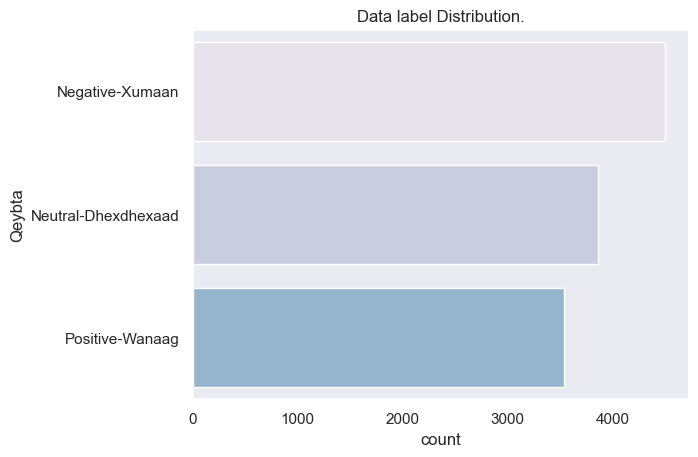

In [37]:
import seaborn as sns

# Set the background to black
sns.set(style="dark")

# Define the color palette
colors = sns.color_palette("PuBuGn")

# Plot the countplot
sns.countplot(
    y="Qeybta",
    order=ml_data_df["Qeybta"].value_counts().index,
    data=ml_data_df,
    palette=colors
).set(title='Data label Distribution.')


There are 183592 words in the combination of all reviews.


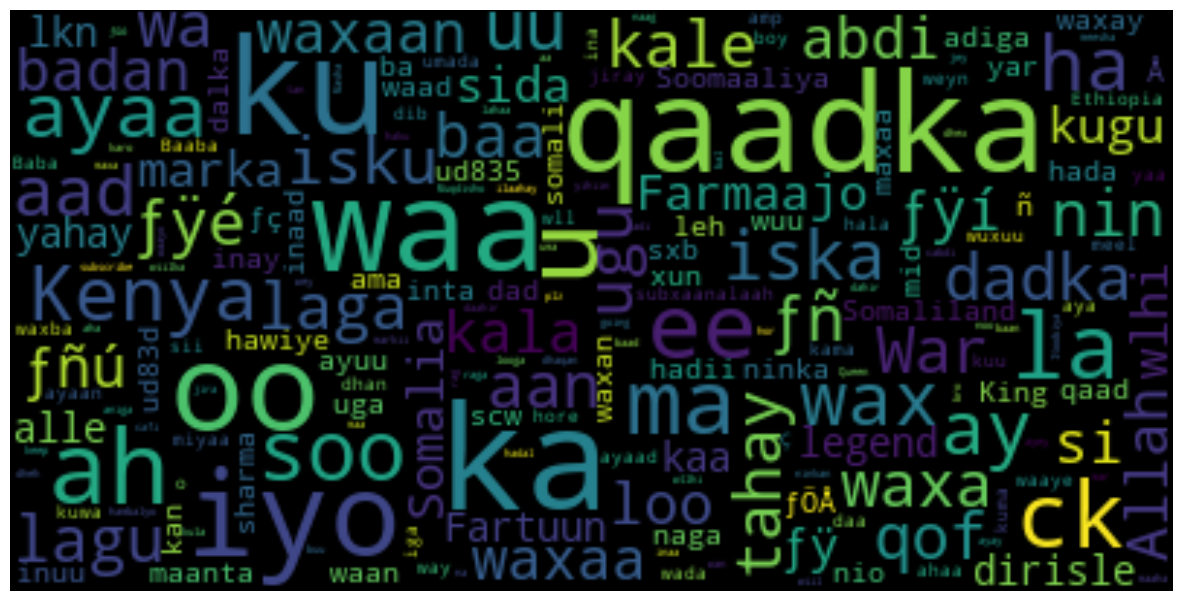

In [47]:
def wordcloud(df, text='Qoraalka'):
    # Join all text data in one string
    corpus = " ".join(str(review) for review in ml_data_df[text])
    
    print(f"There are {len(corpus.split())} words in the combination of all reviews.")
    
    # Generate the word cloud
    wordcloud = WordCloud(max_font_size=50, 
                          max_words=200, 
                          collocations=False,
                          background_color="black").generate(corpus)
    
    # Plot the word cloud
    plt.figure(figsize=(15,15))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Visualize word cloud
wordcloud(ml_data_df)

There are 32 words in the combination of all negative reviews.


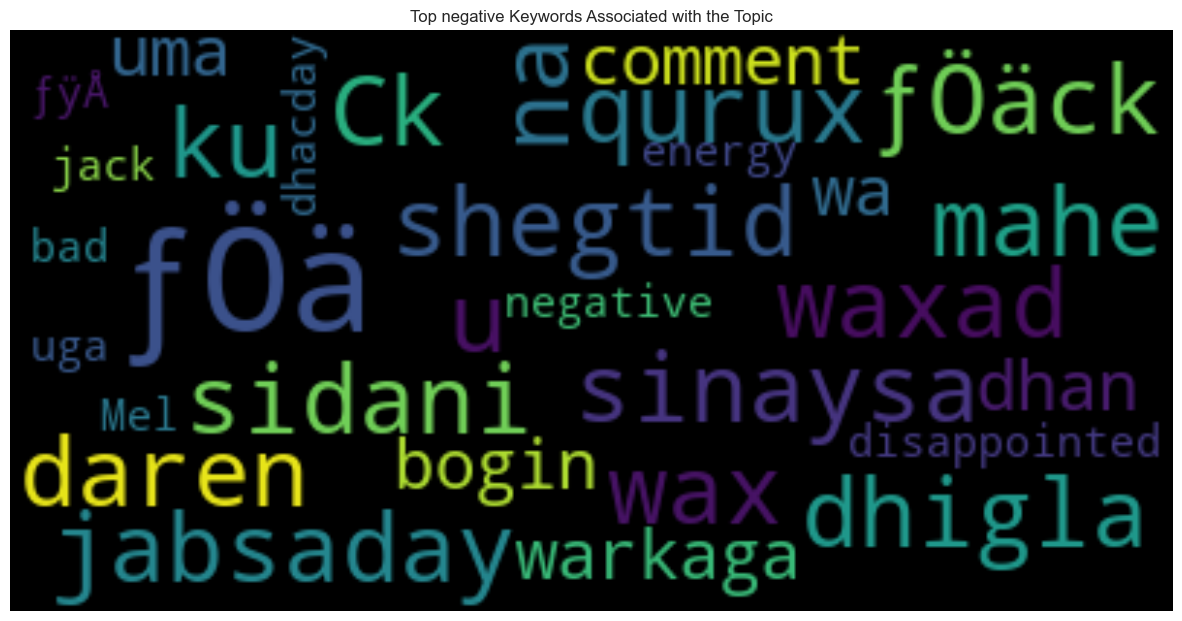

In [46]:


def wordcloud(ml_data_df, text='Qoraalka', sentiment='positive'):
    # Filter text based on sentiment
    filtered_corpus = " ".join(str(review) for review in ml_data_df[text] if sentiment in review)
    
    print(f"There are {len(filtered_corpus.split())} words in the combination of all {sentiment} reviews.")
    
    # Generate the word cloud
    wordcloud = WordCloud(max_font_size=50, 
                          max_words=200, 
                          collocations=False,
                          background_color="black").generate(filtered_corpus)
    
    # Plot the word cloud
    plt.figure(figsize=(15,15))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Top {sentiment} Keywords Associated with the Topic")
    plt.show()

# Visualize word cloud for negative keywords
wordcloud(ml_data_df, sentiment='negative')